<a href="https://colab.research.google.com/github/ramafadilah17/ramafadilah17.github.io/blob/main/Hands-On%20-%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
# langkah pertama kita akan import pandas agar dapat memudahkan nanti untuk memasukan dataset


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
# lalu kita akan memasukan dataset

df = pd.read_csv("dataset.csv")

# Data Understanding

In [ ]:
# kita run dan akan muncul data nya

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# kita bisa mengetahui berapa banyak row dan kolom yang ada pada data dengan menggunakan formula di bawah ini

df.shape

(7043, 21)

In [ ]:
# kita juga dapat memunculkan nama nama nama kolom yang ada pada data

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# kita juga dapat memeriksa apakah ada yang tidak sesuai dengan datanya seperti apakah ada data yang kosong, lalu apa ada tipe data yang tidak sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


ternyata ada data yang tipe datanya salah yaitu TotalCharges harusnya bertipe float

In [ ]:
# untuk mengubah tipe datanya, kita dapat menggunakan formula di bawah ini :

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [ ]:
# dan setelah kita cek lagi tipe datanya akan langsung berubag menjadi float

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dapat dilihat tipe datanya sudah berubah. tapi ternyata setelah tipe datanya dirubah ada data yang null pada

itu bisa di biarkan atau kita juga bisa dihilangkan

In [ ]:
# jika ingin dihilangkan gunakan formula di bawah ini :

df.fillna(np.median(df.TotalCharges), inplace = True)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


jika kita lihat, ternyata itu bisa dihilangkan tetapi jumlah row nya berkurang karena mengikuti kolom TotalCharges

In [ ]:
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn', 'customerID']]
nums=[i for i in df.columns if df[i].dtypes != 'object']

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

In [ ]:
# selanjutnya kita akan melihat data di masing masing kolom dengan menggunakan formula di bawah ini :
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3549
Female    3483
Name: gender, dtype: int64

Value count kolom Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Value count kolom DeviceProtection:
No                     3094
Yes              

bisa dilihat, di atas merupakan data yang bisa lihat di masing masing kolom. kolom di atas hanya kolom yang bertipe kategorik atau yang bertipe object

## Statistical summary

Selanjutnya kita munculkan ringkasan statistik dataframe

### Pendekatan numerik

In [ ]:
# selanjutnya kita akan menganalisis data kolom numerik atau data yang bertipe int dan float

df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

- karena nilai yang ditampilkan ini pada kolom numerik dan berupa angka jadi nilai yang tertera masuk akal
- rata rata nilai min/max nya masih menunjukan batas yang wajar
- untuk kolom TotalCharges menunjukan perbedaan yang cukup signifikan karen nilai nya cukup jauh dari mean/median

### Pendekatan kategorik

In [ ]:
#  selanjutnya kita akan menganalisis data kolom kategorik

df[cats].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

- unique values masuk akan karena ini adalah tipe object jadi biasanya unique values sedikit
- ada frekuensi yang terlalu timpang, contohnya pada kolom PhoneService dan PaymentMethod. Frekuensinya terlalu jauh dengan count

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot

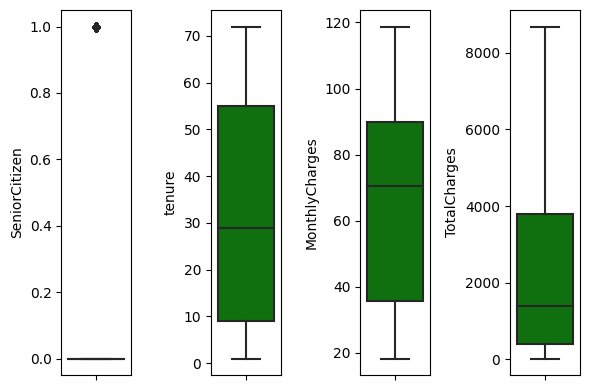

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

- jarak outlier di setiap kolom tentunya berbeda.
1. untuk SeniorCitizen jarak oulier bawah dan atas sama sama 0, itu karena Q1 dan Q3 nya sama sama 0
2. untuk tenure jarak oulier bawah dan atas sebesar 59 dan 124
3. untuk MonthlyCharges jarak oulier bawah dan atas sebesar 45 dan 171
4. untuk TotalCharges jarak oulier bawah dan atas sebesar 4.690 dan 8.886

- jika melihat plot bisa dikatakan bahwa distribusinya tidak normal

### Histplot

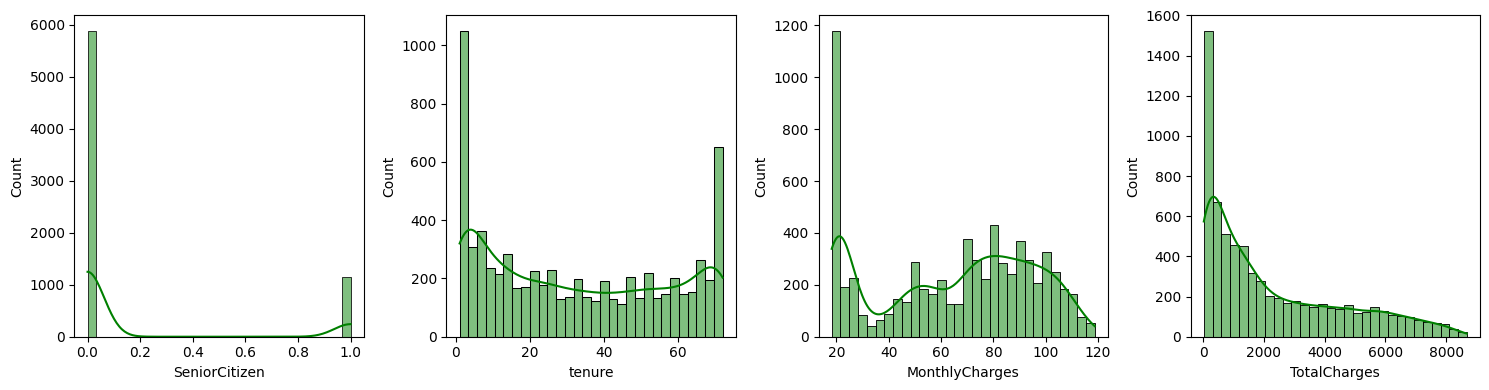

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

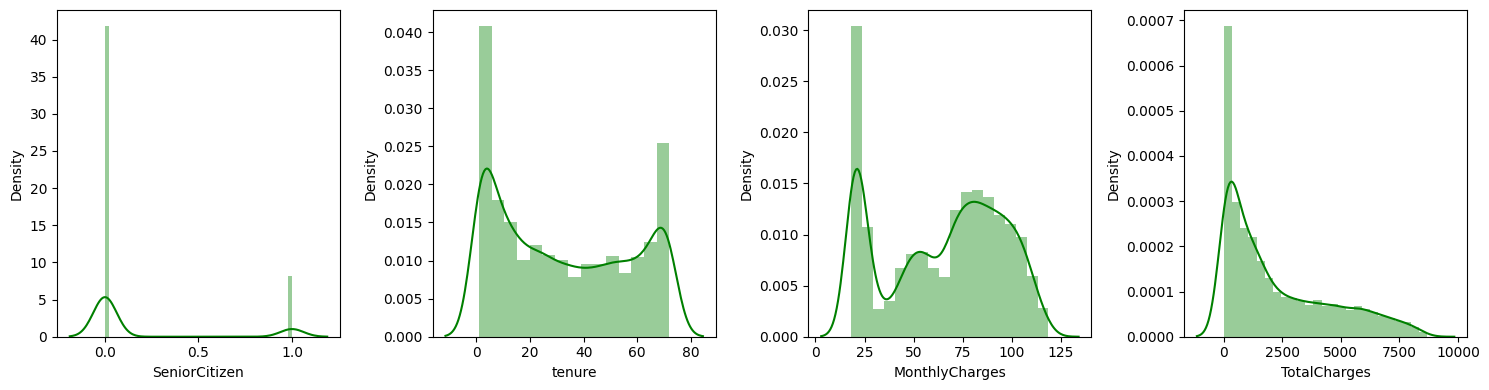

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

- jika dilihat, keempat kolom memiliki bentuk distribusi positif skewed. karena memiliki ekor yang memanjang ke sebelah kanan dati titik puncak (modus)
- untuk titik puncak menunjukan nilai dari modus nya, pada kolom tenure dan MonthlyCharges ada titik yang menujukan kelonjakan tetapi tidak melebihi titik puncak (modus)



### Countplot (categorical)

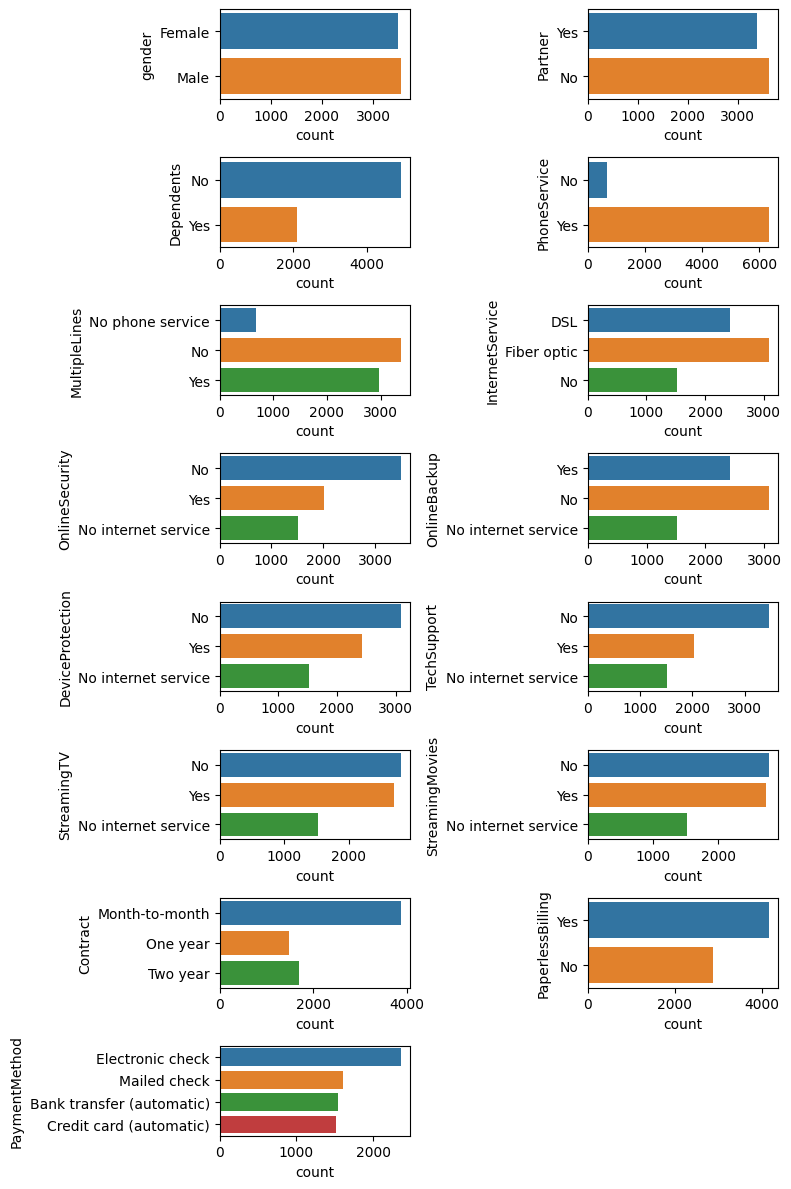

In [ ]:
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

beberapa kolom menunjukan ketimpangan, itu bisa dilihat karena perbedaan ukuran panjang pada batang seperti yang dilihat pada kolom PhoneService, dependents, multiples, contracts

### Correlation heatmap

<Axes: >

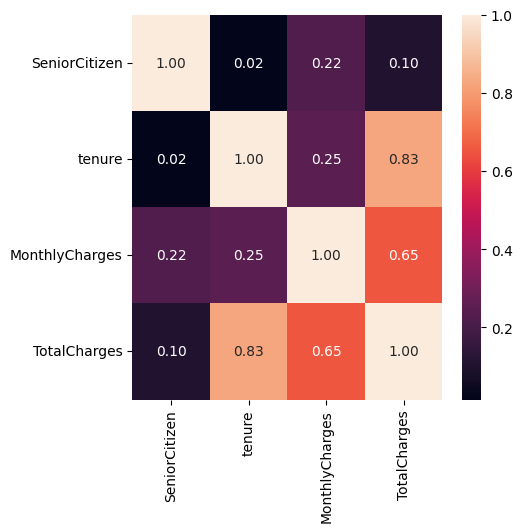

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

- sebuah data akan menunjukan korelasi yang kuat jika antar korelasi memiliki nilai lebih dari 0.6. dan jika dilihat, kolom TotalCharges dan tenure memili korelasi yang kuat karena nilai nya sebesar 0.83 dan kolom TotalCharges dan MonthlyCharges juga memiliki korelasi yang cukup kuat karena memiliki nilai 0.65
- tidak ada kolom yang saling berkorelasi kuat sampai 0.9

### Category Plot

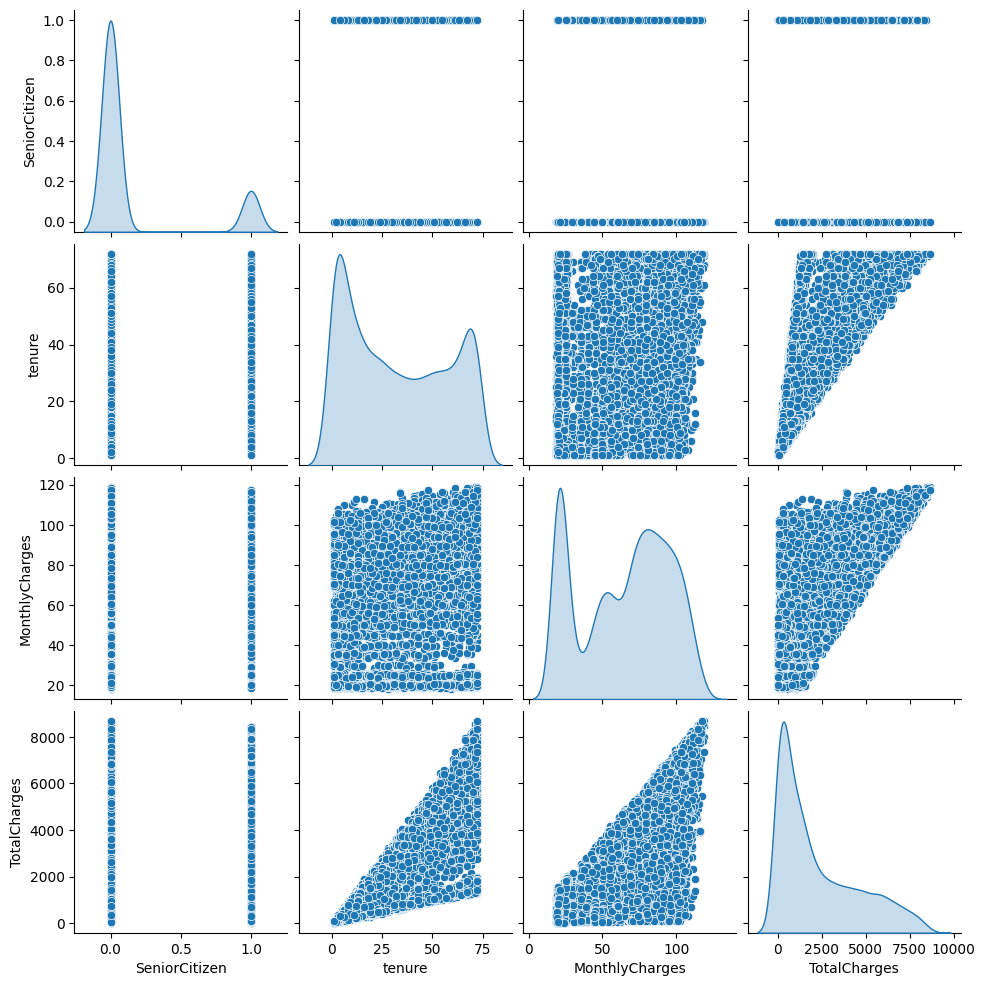

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

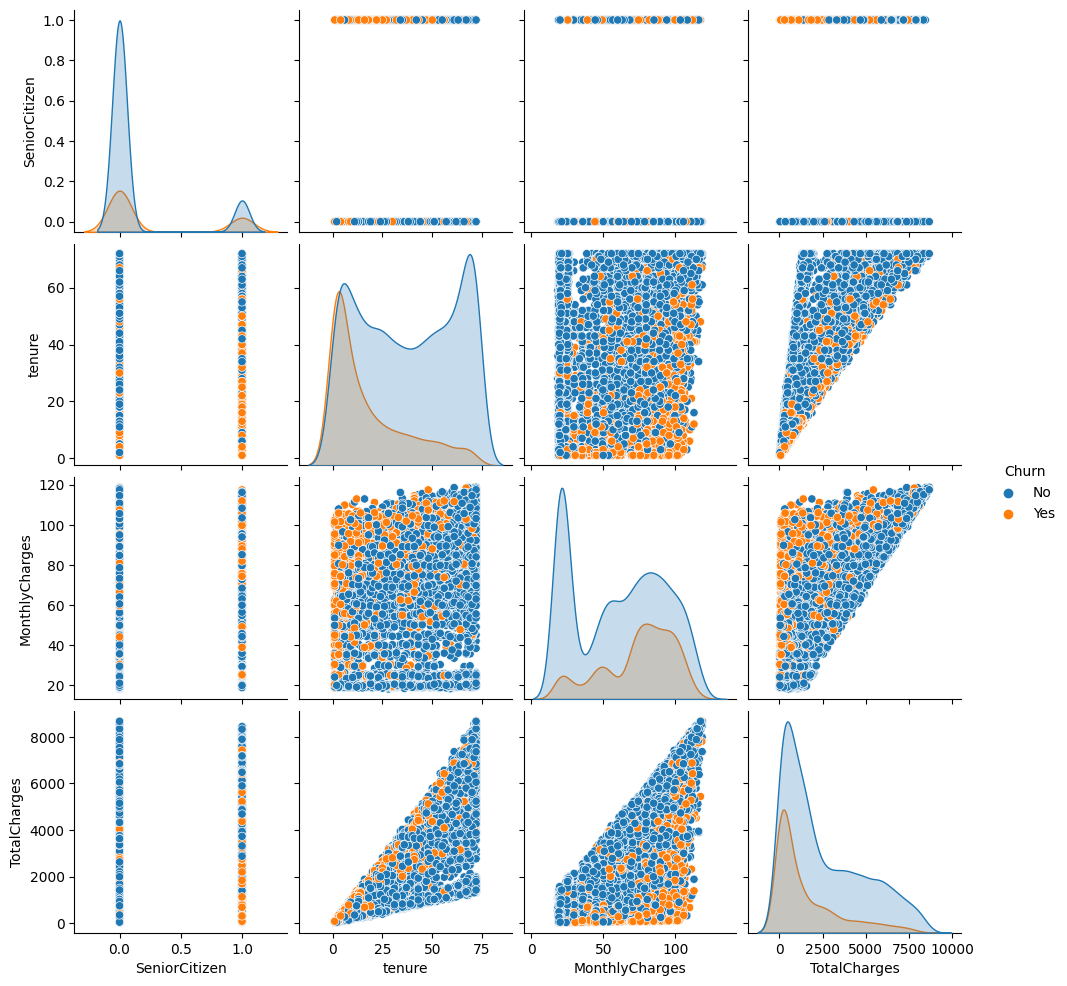

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

tidak ada, jika dilihat kedua warna menyatu dan karena tidak terpisah maka kombinasi kolom nya kurang bagus